# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux20/Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13949999688193201


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
is_learning    = True
episodes       = 1000
demo_games     = 5
checkpointfile = 'reacher.ckpt'

In [2]:
SEED                = 2020
REPLAY_BUFFER_SIZE  = 1e+6
ACTOR_LR            = 1e-4
CRITIC_LR           = 1e-4 # DDPG Paper = 1e-3
GAMMA               = 0.99
TAU                 = 1e-3
BATCH_SIZE          = 64   # DDPG Paper = 32
WEIGHT_DECAY        = 0    # DDPG Paper = 1e-2

In [3]:
from unityagents import UnityEnvironment

In [4]:
if is_learning:
    env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64', no_graphics=True)
else:
    env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
brain_name  = env.brain_names[0]
env_info    = env.reset(train_mode=True)[brain_name]
brain       = env.brains[brain_name]

num_agents  = len(env_info.agents)
states      = env_info.vector_observations
action_size = brain.vector_action_space_size
state_size  = states.shape[1]

print(f'Env has {num_agents} agents. Total states = {state_size}, Possible actions = {action_size}')

Env has 1 agents. Total states = 33, Possible actions = 4


In [6]:
import torch as T

class CheckDevice(object):
    """
    Check if a compatible graphics card is available
    """
    def __init__(self):
        if T.cuda.is_available():
            self._device = T.device('cuda:0')
            print(f'Using CUDA: {T.cuda.get_device_name()}')
        else:
            self._device = T.device('cpu')
            print('Using CPU')
    
    @property
    def device(self):
        return self._device
    
if __name__ == '__main__':
    print(CheckDevice().device)

Using CUDA: GeForce RTX 2060 SUPER
cuda:0


In [7]:
DEVICE = CheckDevice().device

Using CUDA: GeForce RTX 2060 SUPER


In [8]:
# Ornstein-Uhlenbeck Noise
# More info https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process

import numpy as np

class OUNoise:
    """Ornstein-Uhlenbeck Noise.
    theta >0 : Speed of reversion
    sigma >0 : The standard deviation parameter, determines volatility
    W_{t}    : Wiener process
    mu       : Drift term - long term mean level
    Default values from DDPG paper: theta=0.15, sigma=0.20
    DDPG Paper: https://arxiv.org/pdf/1509.02971.pdf
    """
    def __init__(self, action_len, seed=0, theta=0.15, sigma=0.20, mu=0):
        self.action_len = action_len
        self.seed  = seed
        self.theta = theta
        self.sigma = sigma
        self.mu = mu
        
        np.random.seed(self.seed)
        self.reset()

    def reset(self):
        self.state = np.ones(self.action_len) * self.mu

    def add_noise(self):
        x  = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        return self.state

In [9]:
from collections import namedtuple, deque
import random

class ReplayBuffer:
    """
    Experience('state', 'action', 'next_state', 'reward', 'done')
    Default values from DDPG paper: Replay buffer size = 1e+6
    DDPG Paper: https://arxiv.org/pdf/1509.02971.pdf
    """
    def __init__(self, capacity=1e+6, seed=0):
        self.memory     = deque(maxlen=int(capacity))
        self.seed       = random.seed(seed)
        self.device     = DEVICE
        self.experience = namedtuple("Experience", 
                                     field_names=["state", "action", "reward", "next_state", "done"])
    
    def save(self, state, action, reward, next_state, done):
        experience = self.experience(state, action, reward, next_state, done)
        self.memory.append(experience)
    
    def retrieve(self, batch_size):
        experiences = random.sample(self.memory, k=batch_size)
        return experiences

    def __len__(self):
        return len(self.memory)

In [10]:
import math

import torch as T
import torch.nn as nn
import torch.nn.functional as F

class Actor(nn.Module):
    """
    Enhancement TODO: Add Batch Normalization to match DDPG paper
    
    DDPG paper (https://arxiv.org/pdf/1509.02971.pdf) ref:
    ------------------------------------------------------
    We used Adam (Kingma & Ba, 2014) for learning the neural network parameters 
    with a learning rate of 10−4 and 10−3 for the actor and critic respectively.
    
    The low-dimensional networks had 2 hidden layers with 400 and 300 units 
    respectively (≈ 130,000 parameters). 
    
    Actions were not included until the 2nd hidden layer of Q. 
    
    << When learning from pixels we used 3 convolutional layers
    (no pooling) with 32 filters at each layer. >> 
    
    This was followed by two fully connected layers with 200 units. 
    
    The final layer weights and biases of both the actor and critic
    were initialized from a uniform distribution [−3 × 10−3, 3 × 10−3] 
    """
    def __init__(self, states_len, actions_len, lr=1e-4, hidden_nodes=[330, 160], seed=0, name='actor'):
        super(Actor, self).__init__()

        self.seed   = T.manual_seed(seed)
        self.device = DEVICE
        
        self.states_len  = states_len
        self.actions_len = actions_len
        self.hidden_in   = hidden_nodes[0]
        self.hidden_out  = hidden_nodes[1]
        self.name        = name
        
        self.inp = nn.Linear(self.states_len, self.hidden_in)
        self.h1  = nn.Linear(self.hidden_in, self.hidden_out)
        self.out = nn.Linear(self.hidden_out, self.actions_len)
        
        self.init_WandB(self.inp)
        self.init_WandB(self.h1)
        self.init_WandB(self.out, stdv_sigma=3e-3)

        # Convert the tensors based on available device
        self.to(self.device)

    def init_WandB(self, layer, stdv_sigma=None):
        """
        Initialize weights and biases for a better convergence
        """
        # Find standard deviation
        if stdv_sigma is None:
            stdv_sigma = 1. / math.sqrt(layer.weight.data.size()[0])

        # Use the stdv as the upper and lower boundary
        T.nn.init.uniform_(layer.weight.data, -stdv_sigma, stdv_sigma)
        T.nn.init.uniform_(layer.bias.data, -stdv_sigma, stdv_sigma)

    def forward(self, states):
        """
        Build the policy/actor network that maps states to actions.
        Using Tanh activation as per DDPG paper
        """
        l1_states  = F.relu(self.inp(states))
        l2_states  = F.relu(self.h1(l1_states))
        l3_actions = T.tanh(self.out(l2_states))

        return l3_actions
    
    def save_model(self, filename):
        filedata = filename.split('.')
        filename = filedata[0] + '_' + self.name + '.' + filedata[1]
        T.save(self.state_dict(), filename)
        
    def load_model(self, filename):
        filedata = filename.split('.')
        filename = filedata[0] + '_' + self.name + '.' + filedata[1]
        self.load_state_dict(T.load(filename))
        
if __name__ == '__main__':
    actor = Actor(33,4, hidden_nodes=[33//2, 33//4])
    print(f'{actor}')

Actor(
  (inp): Linear(in_features=33, out_features=16, bias=True)
  (h1): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=4, bias=True)
)


In [11]:
import math

import torch as T
import torch.nn as nn
import torch.nn.functional as F

class Critic(nn.Module):
    """
    DDPG paper (https://arxiv.org/pdf/1509.02971.pdf) ref:
    ------------------------------------------------------
    We used Adam (Kingma & Ba, 2014) for learning the neural network parameters 
    with a learning rate of 10−4 and 10−3 for the actor and critic respectively.
    
    The low-dimensional networks had 2 hidden layers with 400 and 300 units 
    respectively (≈ 130,000 parameters). 
    
    Actions were not included until the 2nd hidden layer of Q. 
    
    << When learning from pixels we used 3 convolutional layers
    (no pooling) with 32 filters at each layer. >> 
    
    This was followed by two fully connected layers with 200 units. 
    
    The final layer weights and biases of both the actor and critic
    were initialized from a uniform distribution [−3 × 10−3, 3 × 10−3] 
    """
    def __init__(self, states_len, actions_len, lr=1e-3, hidden_nodes=[330, 160], seed=0, name='critic'):
        super(Critic, self).__init__()
        
        self.seed   = T.manual_seed(seed)
        self.device = DEVICE
        
        self.states_len  = states_len
        self.actions_len = actions_len
        self.hidden_in   = hidden_nodes[0]
        self.hidden_out  = hidden_nodes[1]
        self.name        = name
        
        self.inp = nn.Linear(self.states_len, self.hidden_in)
        self.h1  = nn.Linear(self.hidden_in + actions_len, self.hidden_out)
        self.out = nn.Linear(self.hidden_out, 1)
        
        self.init_WandB(self.inp)
        self.init_WandB(self.h1)
        self.init_WandB(self.out, stdv_sigma=3e-3)
        
        self.to(self.device)
        
    def init_WandB(self, layer, stdv_sigma=None):
        """
        Initialize weights and biases for a better convergence
        """
        # Find standard deviation
        if stdv_sigma is None:
            stdv_sigma = 1. / math.sqrt(layer.weight.data.size()[0])

        # Use the stdv as the upper and lower boundary
        T.nn.init.uniform_(layer.weight.data, -stdv_sigma, stdv_sigma)
        T.nn.init.uniform_(layer.bias.data, -stdv_sigma, stdv_sigma)

    def forward(self, state, action):
        l1_states         = F.relu(self.inp(state))
        l1_states_actions = T.cat((l1_states, action), dim=1)
        l2_states_actions = F.relu(self.h1(l1_states_actions))
        l3_states_actions = F.relu(self.out(l2_states_actions))
        
        return l3_states_actions
    
    def save_model(self, filename):
        filedata = filename.split('.')
        filename = filedata[0] + '_' + self.name + '.' + filedata[1]
        T.save(self.state_dict(), filename)
        
    def load_model(self, filename):
        filedata = filename.split('.')
        filename = filedata[0] + '_' + self.name + '.' + filedata[1]
        self.load_state_dict(T.load(filename))

In [12]:
import torch.optim as optim

class DDPGAgent:
    def __init__(self, state_size, action_size, seed=0, batch_size=32):
        self.state_size  = state_size
        self.action_size = action_size
        self.device      = DEVICE
        self.seed        = seed
        self.batch_size  = batch_size

        self.actor_local      = Actor(state_size, action_size, seed=self.seed, name='lactor')
        self.actor_target     = Actor(state_size, action_size, seed=self.seed, name='tactor')
        self.actor_optimizer  = optim.Adam(self.actor_local.parameters(), lr=ACTOR_LR)

        self.critic_local     = Critic(state_size, action_size, seed=self.seed, name='lcritic')
        self.critic_target    = Critic(state_size, action_size, seed=self.seed, name='tcritic')
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=CRITIC_LR, weight_decay=WEIGHT_DECAY)

        self.noise  = OUNoise(action_size, seed=self.seed)
        self.memory = ReplayBuffer(capacity=REPLAY_BUFFER_SIZE, seed=self.seed)

    def step(self, state, action, reward, next_state, done):
        self.memory.save(state, action, reward, next_state, done)
        
        if len(self.memory) > self.batch_size:
            experiences = self.memory.retrieve(self.batch_size)
            self.learn(experiences, GAMMA)

    def get_next_action(self, state, add_noise=True):
        state = T.from_numpy(state).float().to(self.device)
        self.actor_local.eval()
        with T.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        action += self.noise.add_noise()
        # Set -1 to 1 boundary before returning the action value 
        # as per "Every entry in the action vector should be a number between -1 and 1."
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        # Rearrange the tensors to use with learning 
        states      = T.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions     = T.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(self.device)
        rewards     = T.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = T.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones       = T.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)

        # Get predicted next-state actions and Q values from target models
        actions_next   = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        Q_expected  = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        # Normalize gradients to avoid high gradients
        T.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        actions_pred = self.actor_local(states)
        # Getting the average value from Critic to compare against Actor action
        actor_loss   = -self.critic_local(states, actions_pred).mean()

        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # Update networks
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
    def save_models(self, filename):
        self.actor_local.save_model(filename)
        self.actor_target.save_model(filename)
        self.critic_local.save_model(filename)
        self.critic_target.save_model(filename)
        
    def load_models(self, filename):
        self.actor_local.load_model(filename)
        self.actor_target.load_model(filename)
        self.critic_local.load_model(filename)
        self.critic_target.load_model(filename)

### Instantiate an agent

In [13]:
agent = DDPGAgent(state_size, action_size, SEED, BATCH_SIZE)

### Training the agent

In [14]:
import datetime
from pytictoc import TicToc

scores     = []
avg_scores = []
avg_score, max_avg_score = None, None
steps_done = 1

if is_learning:
    t = TicToc()
    t.tic()
    for ep in range(1, episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state    = env_info.vector_observations[0]
        done     = False
        rewards  = 0

        while not done:
            action     = agent.get_next_action(state)
            env_info   = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward     = env_info.rewards[0]
            done       = env_info.local_done[0]

            agent.step(state, action, reward, next_state, done)

            rewards += reward
            state    = next_state

        scores.append(rewards)
        avg_score = np.mean(scores[-100:])
        avg_scores.append(avg_score)
        elapsed   = str(datetime.timedelta(seconds = t.tocvalue())) 

        if max_avg_score is None or max_avg_score < avg_score:
            max_avg_score = avg_score

        print(f'\r{ep:5d}/{episodes}: Score = {rewards:3.2f} << Last 100 Avg = {avg_score:3.2f}, Max Avg = {max_avg_score:3.2f} >> Time Elapsed = {elapsed}    ', end='')

        if ep % 100 == 0:
            agent.save_models(checkpointfile)
            print('Models saved.')

        if avg_score > 30:
            print(f'\n\nSolved in {ep} episodes - Received an average score of {avg_score:4.2f} in last 100')
            agent.save_models(checkpointfile)
            break

    print(f'\nTraining completed. Model saved to {checkpointfile}')

  100/1000: Score = 5.32 << Last 100 Avg = 3.49, Max Avg = 3.49 >> Time Elapsed = 0:10:56.082118    Models saved.
  200/1000: Score = 14.60 << Last 100 Avg = 10.64, Max Avg = 10.64 >> Time Elapsed = 0:22:03.241901    Models saved.
  300/1000: Score = 19.76 << Last 100 Avg = 15.00, Max Avg = 15.02 >> Time Elapsed = 0:33:54.867657    Models saved.
  400/1000: Score = 12.26 << Last 100 Avg = 19.22, Max Avg = 19.29 >> Time Elapsed = 0:46:49.465486    Models saved.
  500/1000: Score = 15.53 << Last 100 Avg = 27.71, Max Avg = 27.71 >> Time Elapsed = 1:00:22.775709    Models saved.
  541/1000: Score = 33.88 << Last 100 Avg = 30.05, Max Avg = 30.05 >> Time Elapsed = 1:05:55.636624    

Solved in 541 episodes - Received an average score of 30.05 in last 100

Training completed. Model saved to reacher.ckpt


[]

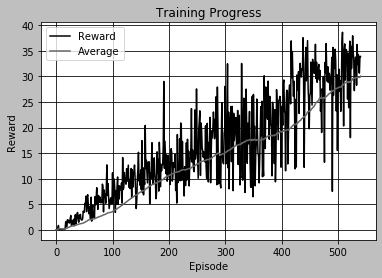

In [15]:
from matplotlib import pyplot as plt
plt.style.use(plt.style.available[random.randint(0, len(plt.style.available)-1)])
plt.title('Training Progress')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True)
plt.plot(scores, label='Reward')
plt.plot(avg_scores, label='Average')
plt.legend()
plt.plot()

### Trained Agent - Demo

In [16]:
agent.load_models(checkpointfile)
t = TicToc()
for game in range(1, demo_games + 1):
    t.tic()
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.get_next_action(state)          # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        print(f'\rGame {game:2d}: Total Score = {score:4.2f}', end='')
        if done:                                       # exit loop if episode finished
            print(f' Done after {t.tocvalue():5.2f} seconds')
            break
print(f'All {demo_games} games played')

Game  1: Total Score = 33.43 Done after 78.82 seconds
Game  2: Total Score = 33.94 Done after 79.62 seconds
Game  3: Total Score = 34.02 Done after 79.62 seconds
Game  4: Total Score = 39.14 Done after 79.62 seconds
Game  5: Total Score = 29.79 Done after 79.62 seconds
All 5 games played


In [17]:
env.close()